In [42]:

import os


import tensorflow as tf
from tensorflow import keras


import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd


from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix 

print(tf.__version__)

2.12.0


In [43]:

imagepaths = []

for root, dirs, files in os.walk(".", topdown=False): 
  for name in files:
    path = os.path.join(root, name)
    if path.endswith("jpg" ):
      imagepaths.append(path)

print(len(imagepaths)) 
print(imagepaths)

2500
['.\\asl_images\\10_J\\1.jpg', '.\\asl_images\\10_J\\10.jpg', '.\\asl_images\\10_J\\100.jpg', '.\\asl_images\\10_J\\11.jpg', '.\\asl_images\\10_J\\12.jpg', '.\\asl_images\\10_J\\13.jpg', '.\\asl_images\\10_J\\14.jpg', '.\\asl_images\\10_J\\15.jpg', '.\\asl_images\\10_J\\16.jpg', '.\\asl_images\\10_J\\17.jpg', '.\\asl_images\\10_J\\18.jpg', '.\\asl_images\\10_J\\19.jpg', '.\\asl_images\\10_J\\2.jpg', '.\\asl_images\\10_J\\20.jpg', '.\\asl_images\\10_J\\21.jpg', '.\\asl_images\\10_J\\22.jpg', '.\\asl_images\\10_J\\23.jpg', '.\\asl_images\\10_J\\24.jpg', '.\\asl_images\\10_J\\25.jpg', '.\\asl_images\\10_J\\26.jpg', '.\\asl_images\\10_J\\27.jpg', '.\\asl_images\\10_J\\28.jpg', '.\\asl_images\\10_J\\29.jpg', '.\\asl_images\\10_J\\3.jpg', '.\\asl_images\\10_J\\30.jpg', '.\\asl_images\\10_J\\31.jpg', '.\\asl_images\\10_J\\32.jpg', '.\\asl_images\\10_J\\33.jpg', '.\\asl_images\\10_J\\34.jpg', '.\\asl_images\\10_J\\35.jpg', '.\\asl_images\\10_J\\36.jpg', '.\\asl_images\\10_J\\37.jpg', '.\\

In [44]:
def plot_image(path):
  img = cv2.imread(path) # Reads the image into a numpy.array
  img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (RGB)
  print(img_cvt.shape) # Prints the shape of the image just to check
  plt.grid(False) # Without grid so we can see better
  plt.imshow(img_cvt) # Shows the image
  plt.xlabel("Width")
  plt.ylabel("Height")
  plt.title("Image " + path)

(350, 350)
.\asl_images\10_J\10.jpg


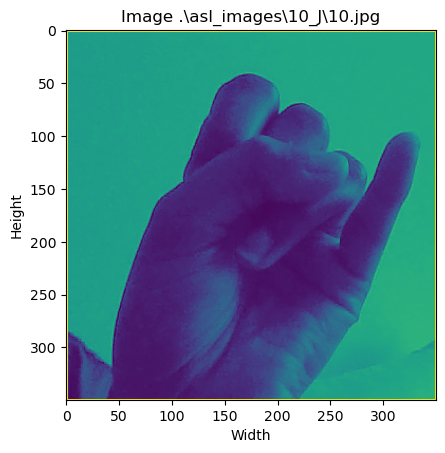

In [45]:
plot_image(imagepaths[1]) 
print(imagepaths[1])

In [46]:
X = [] # Image data
y = [] # Labels

# Loops through imagepaths to load images and labels into arrays
for path in imagepaths:
  img = cv2.imread(path) # Reads image and returns np.array
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (GRAY)
  img = cv2.resize(img, (320,120))#age size so training can be faster
  X.append(img)
  
  category = path.split("\\")[2]
  label = int(category.split("_")[0])
  #print(label)
  y.append(label)


X = np.array(X, dtype="uint8")
X = X.reshape(len(imagepaths), 120, 320, 1)
y = np.array(y)


print("Images loaded: ", len(X))
print("Labels loaded: ", len(y))

Images loaded:  2500
Labels loaded:  2500


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(y_train))
num_classes=10


2000


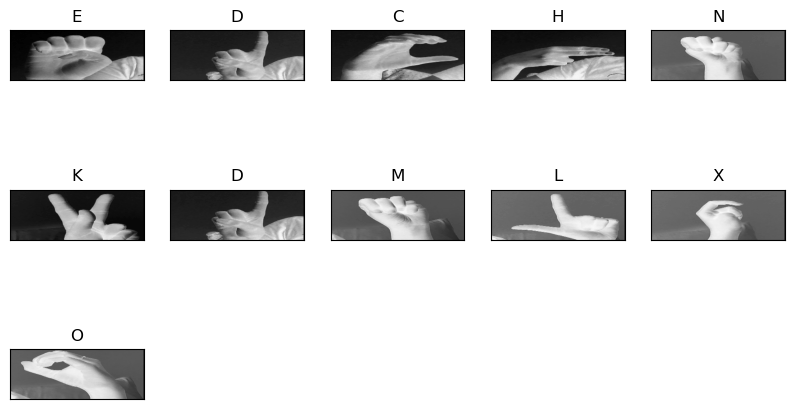

In [48]:
class_names=['','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
plt.figure(figsize=(10, 10))
for i in range(11):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((120,320)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    #print(label_index)
    plt.title(class_names[label_index])
plt.show()


In [49]:
y_train = keras.utils.to_categorical(y_train,num_classes = 26)
y_test = keras.utils.to_categorical(y_test, num_classes = 26)
print(y_test.shape)
print(X_train.shape)

(500, 26)
(2000, 120, 320, 1)


In [50]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(120,320,1))) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(26, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 116, 316, 32)      832       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 58, 158, 32)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 56, 156, 64)       18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 28, 78, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 76, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 38, 64)      

In [51]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
model.fit(X_train, y_train, epochs=5, batch_size=150, verbose=2, validation_data=(X_test, y_test))


Epoch 1/5
14/14 - 45s - loss: 31.9617 - accuracy: 0.5285 - val_loss: 0.0505 - val_accuracy: 0.9900 - 45s/epoch - 3s/step
Epoch 2/5
14/14 - 44s - loss: 0.2681 - accuracy: 0.9570 - val_loss: 0.0127 - val_accuracy: 0.9980 - 44s/epoch - 3s/step
Epoch 3/5
14/14 - 45s - loss: 0.0328 - accuracy: 0.9885 - val_loss: 5.1724e-05 - val_accuracy: 1.0000 - 45s/epoch - 3s/step
Epoch 4/5
14/14 - 45s - loss: 0.0062 - accuracy: 0.9980 - val_loss: 8.9655e-04 - val_accuracy: 1.0000 - 45s/epoch - 3s/step
Epoch 5/5
14/14 - 44s - loss: 5.3052e-04 - accuracy: 1.0000 - val_loss: 1.8813e-04 - val_accuracy: 1.0000 - 44s/epoch - 3s/step


In [54]:
import time,sys
start = time.time()
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_acc*100))
end = time.time()
duration = (end - start)
duration = round(duration, 3)
print('Time: ' + str(duration) + 's')
m1=model.evaluate(X_test, y_test)
print(sys.getsizeof(m1))

16/16 [==============================] - 2s 149ms/step - loss: 1.8813e-04 - accuracy: 1.0000
Test accuracy: 100.00%
Time: 2.444s
16/16 [==============================] - 2s 143ms/step - loss: 1.8813e-04 - accuracy: 1.0000
88


In [15]:
predictions = model.predict(X_test) 

16/16 [==============================] - 2s 108ms/step


In [16]:
y_test=np.argmax(y_test,axis=-1)
#print(y_test)

In [17]:
np.argmax(predictions[0]), y_test[0] 

(23, 23)

In [18]:
def validate_9_images(predictions_array, true_label_array, img_array):
  # Array for pretty printing and then figure size
  class_names = ['','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y'] 
  plt.figure(figsize=(15,5))
  
  for i in range(1, 10):
    # Just assigning variables
    prediction = predictions_array[i]
    true_label = true_label_array[i]
    img = img_array[i]
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    
    # Plot in a good way
    plt.subplot(3,3,i)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(prediction) # Get index of the predicted label from prediction
    
    # Change color of title based on good prediction or not
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'

    plt.xlabel("Predicted: {} {:2.0f}% (True: {})".format(class_names[predicted_label],100*np.max(prediction),
                                  class_names[true_label]),
                                  color=color)
  plt.show()

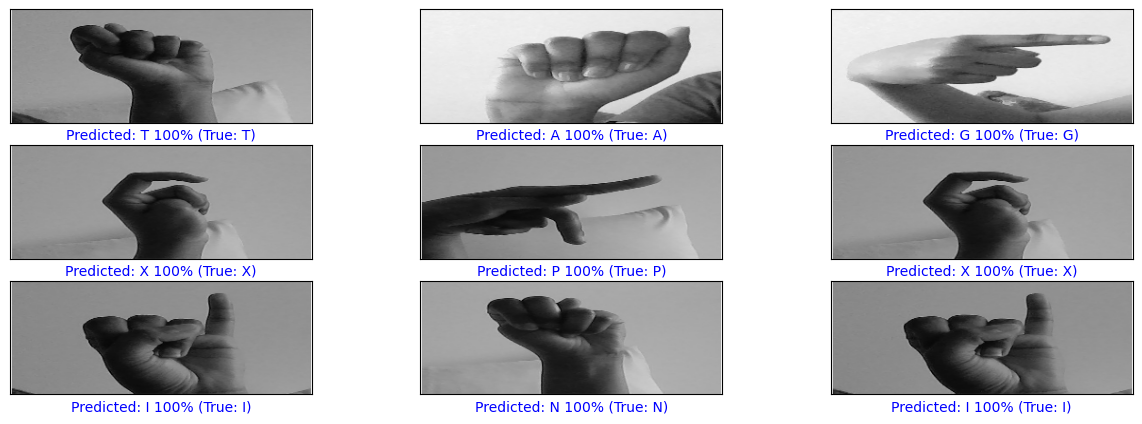

In [19]:
validate_9_images(predictions, y_test, X_test)

In [20]:
y_pred = np.argmax(predictions, axis=1)
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,18,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,34,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,18,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,17,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,19,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,16,...,0,0,0,0,0,0,0,0,0,0


In [21]:
model.save('handrecog.h5')

Benchmark(CPU)

In [55]:
!pip install py-cpuinfo

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(y_train))
num_classes=10

y_train = keras.utils.to_categorical(y_train,num_classes = 26)
y_test = keras.utils.to_categorical(y_test, num_classes = 26)
print(y_test.shape)

2000
(500, 26)


In [57]:
import time
import platform
import cpuinfo 

os_version = platform.system()

print('Python CPU Benchmark')
print('CPU: ' + cpuinfo.get_cpu_info().get('brand_raw', "Unknown"))
print('Arch: ' + cpuinfo.get_cpu_info().get('arch_string_raw', "Unknown"))
print('OS: ' + str(os_version))

print('\nBenchmarking: \n')

average_benchmark = 0
start = time.time()
model=keras.models.load_model('handrecog.h5')
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_acc*100))
end = time.time()
duration = (end - start)
duration = round(duration, 3)
print('Time: ' + str(duration) + 's')

Python CPU Benchmark
CPU: 12th Gen Intel(R) Core(TM) i7-1255U
Arch: AMD64
OS: Windows

Benchmarking: 

16/16 [==============================] - 2s 111ms/step - loss: 4.9113e-06 - accuracy: 1.0000
Test accuracy: 100.00%
Time: 2.144s


**PRUNING**

In [58]:
!pip install tensorflow-model-optimization 

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(y_train))
num_classes=10

y_train = keras.utils.to_categorical(y_train,num_classes = 26)
y_test = keras.utils.to_categorical(y_test, num_classes = 26)
print(y_test.shape)

2000
(500, 26)


In [73]:
import tensorflow_model_optimization as tfmot

prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

# Compute end step to finish pruning after 2 epochs.
batch_size = 50
epochs = 2
validation_split = 0.1 # 10% of training set will be used for validation set. 

num_images = X_train.shape[0] * (1 - validation_split)
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs

# Define model for pruning.
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50,
                                                               final_sparsity=0.80,
                                                               begin_step=0,
                                                               end_step=end_step)
}

model_for_pruning = prune_low_magnitude(model, **pruning_params)

# `prune_low_magnitude` requires a recompile.
model_for_pruning.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_for_pruning.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_conv2d   (None, 116, 316, 32)     1634      
 (PruneLowMagnitude)                                             
                                                                 
 prune_low_magnitude_max_poo  (None, 58, 158, 32)      1         
 ling2d (PruneLowMagnitude)                                      
                                                                 
 prune_low_magnitude_conv2d_  (None, 56, 156, 64)      36930     
 1 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_max_poo  (None, 28, 78, 64)       1         
 ling2d_1 (PruneLowMagnitude                                     
 )                                                               
                                                        

In [76]:
import tempfile
import os


logdir = tempfile.mkdtemp()

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
]
model_for_pruning.fit(X_train, y_train, epochs=2, batch_size=50, validation_data=(X_test, y_test),callbacks=callbacks)

Epoch 1/2
40/40 [==============================] - 44s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/2
40/40 [==============================] - 44s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [77]:
start = time.time()
model_for_pruning_accuracy = model_for_pruning.evaluate(
   X_test, y_test, verbose=2)
end = time.time()
duration = (end - start)
duration = round(duration, 3)
print('Time: ' + str(duration) + 's')
print(sys.getsizeof(model_for_pruning_accuracy))
start = time.time()
baseline_model_accuracy = model.evaluate(X_test, y_test)
end = time.time()
duration = (end - start)
duration = round(duration, 3)
print('Time: ' + str(duration) + 's')
print(sys.getsizeof(baseline_model_accuracy))
print('Baseline test accuracy:', baseline_model_accuracy) 
print('Pruned test accuracy:', model_for_pruning_accuracy)


16/16 - 2s - loss: 0.0000e+00 - accuracy: 1.0000 - 2s/epoch - 146ms/step
Time: 2.388s
88
16/16 [==============================] - 2s 148ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Time: 2.478s
88
Baseline test accuracy: [0.0, 1.0]
Pruned test accuracy: [0.0, 1.0]


**Quantization**

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(y_train))
num_classes=10

y_train = keras.utils.to_categorical(y_train,num_classes = 26)
y_test = keras.utils.to_categorical(y_test, num_classes = 26)
print(y_test.shape)

2000
(500, 26)


In [79]:
import tensorflow_model_optimization as tfmot

quantize_model = tfmot.quantization.keras.quantize_model

# q_aware stands for for quantization aware.
q_aware_model = quantize_model(model)

# `quantize_model` requires a recompile.
q_aware_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

q_aware_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 quantize_layer_2 (QuantizeL  (None, 120, 320, 1)      3         
 ayer)                                                           
                                                                 
 quant_conv2d (QuantizeWrapp  (None, 116, 316, 32)     899       
 erV2)                                                           
                                                                 
 quant_max_pooling2d (Quanti  (None, 58, 158, 32)      1         
 zeWrapperV2)                                                    
                                                                 
 quant_conv2d_1 (QuantizeWra  (None, 56, 156, 64)      18627     
 pperV2)                                                         
                                                                 
 quant_max_pooling2d_1 (Quan  (None, 28, 78, 64)       1

In [80]:
quant = q_aware_model.fit(X_train, y_train,batch_size=50, epochs=2, validation_data=(X_test,y_test))

Epoch 1/2
40/40 [==============================] - 55s 1s/step - loss: 0.3820 - accuracy: 0.9030 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 2/2
40/40 [==============================] - 56s 1s/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000


In [81]:
baseline = model.fit(X_train, y_train, epochs=2, batch_size=50, verbose=2, validation_data=(X_test, y_test))

Epoch 1/2
40/40 - 44s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 44s/epoch - 1s/step
Epoch 2/2
40/40 - 45s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 45s/epoch - 1s/step


In [72]:
import sys
start = time.time()
baseline = model.evaluate(X_test, y_test, verbose=2)
end = time.time()
duration = (end - start)
duration = round(duration, 3)
print('Time: ' + str(duration) + 's')
print(sys.getsizeof(baseline))
start = time.time()
quant = q_aware_model.evaluate(X_test, y_test, verbose=2)
end = time.time()
duration = (end - start)
duration = round(duration, 3)
print('Time: ' + str(duration) + 's')
print('Baseline test accuracy:', baseline)
print('Quant test accuracy:',quant)
print(sys.getsizeof(quant))

16/16 - 2s - loss: 0.0000e+00 - accuracy: 1.0000 - 2s/epoch - 144ms/step
Time: 2.362s
88
16/16 - 3s - loss: 6.1044e-04 - accuracy: 1.0000 - 3s/epoch - 212ms/step
Time: 3.437s
Baseline test accuracy: [0.0, 1.0]
Quant test accuracy: [0.0006104386993683875, 1.0]
88
